# Marketing Analytics Team 4 Emily in Paris Notebook

### Team members:
- Jenny Dong, Helen Lin, Michelle Park, Yani Iben

**Project objective**
- Increasing Emily in Paris audience viewership for Season 5, as the production team has observed declining viewership and ratings

## Importing libraries

In [ ]:
pip install nrclex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=b52d7afc631c14a90b170071c52a40fdf2e42a1f47fc782bf638714c9811028a
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Python API libraries
import requests
# Scrapying Library
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import gutenberg
# Ensure you have NLTK's Gutenberg corpus
import nltk

# Topic modeling, Sentiment Analysis, & Emotion Analysis
from sklearn.feature_extraction.text import CountVectorizer # Data Cleaning
from sklearn.decomposition import LatentDirichletAllocation
import re
from nrclex import NRCLex # Emotion Analysis
from textblob import TextBlob


# Topic Modeling, Sentiment Analysis, & Emotion Analysis


*   In this section, we will perform topic modeling on the transcripts of each episode of all 4 existing seasons of Emily in Paris as well as sentiment & emotion analysis to showcase...




## Season 1 Episode 1: Emily in Paris

In [ ]:
# S1E1

# Load transcript text from file
with open('S1E1.txt', 'r', encoding='utf-8') as file:
    transcript_text = file.read()

# Step 1: Data Cleaning
# Remove line breaks, punctuation, and convert to lowercase
cleaned_text = re.sub(r'\n+', ' ', transcript_text)  # Remove extra line breaks
cleaned_text = re.sub(r'[-]', '', cleaned_text)  # Remove dashes
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)  # Remove non-alphabetical characters
cleaned_text = cleaned_text.lower()  # Convert to lowercase

# Define common English stopwords
stop_words = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",
    "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
    "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor",
    "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
    "now", "httpstranscriptsforeverdreamingorgviewtopicphpt", "httpstranscriptsforeverdreamingorg"
}

# Tokenize manually and remove stopwords
tokens = cleaned_text.split()
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
cleaned_text_processed = ' '.join(tokens)

# Step 2: Topic Modeling with LDA
# Vectorize the text
vectorizer = CountVectorizer(max_df=1.0, min_df=1)
doc_term_matrix = vectorizer.fit_transform([cleaned_text_processed])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract top words for each topic
topics = {}
for idx, topic in enumerate(lda_model.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topics[f'Topic {idx + 1}'] = topic_words

# Display topics as DataFrame
topics_df = pd.DataFrame(topics)
print(topics_df)


FileNotFoundError: [Errno 2] No such file or directory: 'S1E1.txt'

Topic 1: Theme: Normandy and Relaxation

* Key words: "normandy," "holiday," "hope," "hot," "hours," "housekeeper"
* Interpretation: This topic could be related to vacationing or relaxation in Normandy. Words like "holiday," "hours," and "housekeeper" suggest a setting where people are taking time off, potentially involving travel or accommodations.

Topic 2: Theme: Normandy and Interactions
* Key words: "normandy," "holiday," "hope," "hot," "housekeeper," "huh"
* Interpretation: This topic might also focus on Normandy but emphasizes interactions or conversations. Words like "honestly," "huh," and "hope" indicate casual dialogues or interpersonal exchanges.

Topic 3: Theme: French Culture and Encounters
* Key words: "yes," "like," "ah," "well," "emily," "paris," "french"
* Interpretation: This topic likely centers around cultural experiences or encounters in France. Words like "paris," "french," and "emily" suggest that this topic covers Emily's interactions and observations of French culture or lifestyle.

Topic 4: Theme: Travel or Vacation in Normandy
* Key words: "normandy," "holiday," "hope," "hot," "housekeeper," "home"
* Interpretation: This topic could again relate to travel or vacation, specifically in Normandy. Words like "holiday," "hope," and "home" suggest themes of visiting or spending time in a particular place.

Topic 5: Theme: Accommodation and Time Off
* Key words: "normandy," "holiday," "hope," "hot," "housekeeper," "home," "hours"
* Interpretation: This topic likely focuses on accommodation and relaxation, possibly highlighting themes of staying in Normandy, perhaps with mentions of holiday homes or rentals.

In [ ]:
# S1 E1

# Step 3: Sentiment Analysis
# Split the transcript into individual lines for analysis
lines = transcript_text.split('\n')

# Analyze sentiment for each line
sentiments = []
for line in lines:
    blob = TextBlob(line)
    sentiment_score = blob.sentiment.polarity
    sentiments.append(sentiment_score)

# Calculate overall sentiment statistics
average_sentiment = sum(sentiments) / len(sentiments)
positive_lines = sum(1 for score in sentiments if score > 0)
negative_lines = sum(1 for score in sentiments if score < 0)
neutral_lines = sum(1 for score in sentiments if score == 0)

# Display sentiment summary
print("\nSentiment Analysis Summary:")
print(f"Average Sentiment Score: {average_sentiment:.2f}")
print(f"Positive Lines: {positive_lines}")
print(f"Negative Lines: {negative_lines}")
print(f"Neutral Lines: {neutral_lines}")


Sentiment Analysis Summary:
Average Sentiment Score: 0.02
Positive Lines: 115
Negative Lines: 64
Neutral Lines: 913


In [ ]:
# Load transcript text from file
with open('S1E1.txt', 'r', encoding='utf-8') as file:
    transcript_text = file.read()
# Step 1: Clean and prepare text
# Remove character names and extra information, keeping only dialogue
cleaned_text = re.sub(r'^\s*([A-Za-z]+):\s*', '', transcript_text, flags=re.MULTILINE)

# Step 2: Perform Emotion Analysis on the entire transcript
# Use NRCLex for emotion analysis
emotion = NRCLex(cleaned_text)

# Step 3: Aggregate emotion results
emotion_counts = emotion.raw_emotion_scores

# Convert results to DataFrame for easy viewing
emotion_df = pd.DataFrame(list(emotion_counts.items()), columns=['Emotion', 'Count'])
emotion_df = emotion_df.sort_values(by='Count', ascending=False)

# Display the emotion analysis result
print("Emotion Analysis of S1E1 Transcript:")
print(emotion_df)



**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


**Summary of S1E1**:

* Sentiment:
* Emotion:
* Maybe add visualization as well

## Season 1 Episode 2: Male Female

# Time Series Regression

*   In this section, we will train a decision tree regression model (bagging/random forest if needed) for predicting the rating of the episodes.
*   We will use ChatGPT to create a few fictitious episodes of season 5 and use those to showcase how different topics discussed in each episodes are associated with ratings.



### **Below are example code for time series predictive modeling**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("emily_in_paris_features.csv")

# Features and target
X = data[['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Joy', 'Anger', 'Sadness', 'Episode_Number', 'Season']]
y = data['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # Maintain temporal order

# Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Predict season 5 ratings
season_5_features = pd.DataFrame({
    # Use sentiment and emotion averages from previous seasons or simulated values
    'Sentiment_Polarity': [0.3] * 10,
    'Sentiment_Subjectivity': [0.6] * 10,
    'Joy': [0.7] * 10,
    'Anger': [0.2] * 10,
    'Sadness': [0.1] * 10,
    'Episode_Number': list(range(1, 11)),
    'Season': [5] * 10
})
season_5_ratings = model.predict(season_5_features)
print("Predicted Ratings for Season 5:", season_5_ratings)


FileNotFoundError: [Errno 2] No such file or directory: 'emily_in_paris_features.csv'

# Visualization   





# Model 1: Time Series

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the dataset
file_path = 'EIPData.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target
emotion_features = ["Positive", "Trust", "Joy", "Anticipation", "Negative",
                    "Surprise", "Sadness", "Fear", "Anger", "Disgust"]
X = data[emotion_features] # Keep X as a DataFrame
y = data['IMDB ratings (out of 10)']  # Target variable as Series


# Add lagged features (time series component)
for lag in range(1, 5):  # Lag of 1 to 3 episodes
    lagged_features = X.shift(lag)  # Shift features by 'lag' steps
    lagged_features.columns = [f"{col}_lag{lag}" for col in lagged_features.columns]
    X = pd.concat([X, lagged_features], axis=1)

# Drop rows with NaN values caused by lagging
X = X.iloc[3:]
y = y.iloc[3:]

# Impute missing values using SimpleImputer
# Strategy can be 'mean', 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # Convert imputed data back to DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature Importance (coefficients)
feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False) # Now X_train has columns
print("\nFeature Importance:")
print(feature_importance)

RMSE: 0.43
R^2 Score: -0.64

Feature Importance:
Joy                                 0.002951
Fear_lag2                           0.002539
Surprise                            0.002434
Anger_lag2_lag3_lag4                0.002418
Positive_lag1_lag2_lag3_lag4        0.002118
Negative_lag1_lag2_lag3_lag4        0.002047
Sadness_lag2_lag3_lag4              0.001777
Disgust_lag1_lag3                   0.001718
Disgust_lag4                        0.001718
Fear_lag1_lag3_lag4                 0.001692
Anger_lag1_lag3                     0.001648
Anger_lag4                          0.001648
Disgust_lag1_lag2_lag3              0.001586
Disgust_lag2_lag4                   0.001586
Anger_lag2                          0.001531
Disgust_lag2_lag3_lag4              0.001428
Trust                               0.001415
Sadness_lag2                        0.001358
Disgust_lag3_lag4                   0.001313
Disgust_lag1_lag2_lag4              0.001313
Negative_lag1_lag3                  0.001271
Negati

In [ ]:
# Set Pandas options to display all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Disgust_lag1_lag3              0.007259
Anger_lag1_lag3                0.006770
Disgust_lag1_lag2_lag3         0.006576
Joy                            0.005530
Fear_lag2                      0.004878
Positive_lag1_lag2_lag3        0.003688
Surprise                       0.003144
Trust_lag2                     0.002997
Sadness_lag1_lag3              0.002992
Positive_lag1_lag3             0.002864
Trust                          0.002749
Anger_lag2                     0.002692
Anger_lag1_lag2_lag3           0.002613
Trust_lag1                     0.002539
Negative_lag1                  0.002499
Trust_lag2_lag3                0.002485
Surprise_lag1_lag2             0.001882
Surprise_lag3                  0.001882
Anticipation_lag2              0.001796
Surprise_lag1                  0.001588
Fear_lag1                      0.001366
Disgust                        0.001342
Joy_lag2_lag3                  0.001249
Sadness_lag1_lag2_lag3         0.001181
Disgust_lag3       

## Time Series Regression Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


RMSE: 0.43
R² Score: -0.64


In [ ]:
baseline_predictions = [y_train.mean()] * len(y_test)
baseline_r2 = r2_score(y_test, baseline_predictions)
print(f"Baseline R²: {baseline_r2:.2f}")


Baseline R²: -0.02


**Time Series shows the worst test performance among all 3 models**

## Now we want to improve its performance by applying regularization (Ridge, Lasso)



*   Ridge Regression
    * Penalizes large coefficients to reduce model complexity.
    * Suitable for handling multicollinearity without dropping features.
*   Lasso Regression
    * Shrinks some coefficients to zero, effectively performing feature selection.
    * Useful for reducing the number of lagged features when many have minimal impact.


## Season 5 Hypothetical Data and Prediction Script: Simulate Feature Changes of Ratings

* Understand how increasing or decreasing important features (e.g., Anger_lag1_lag3) influences ratings.

In [ ]:
import pandas as pd
import numpy as np
# Original predictions
original_predictions = model.predict(X_test)

# Simulate changes: Increase Anger_lag1_lag3 by 10%
X_test_simulated = X_test.copy()
X_test_simulated['Anger_lag1_lag3'] *= 1.1

# Predict with modified features
simulated_predictions = model.predict(X_test_simulated)

# Compare predictions
change_in_ratings = simulated_predictions - original_predictions
results = pd.DataFrame({
    'Original Ratings': original_predictions,
    'Modified Ratings': simulated_predictions,
    'Change in Ratings': change_in_ratings
})
print(results)

   Original Ratings  Modified Ratings  Change in Ratings
0          6.880249          6.887019           0.006770
1          6.720912          6.742576           0.021665
2          6.486834          6.517976           0.031143
3          6.865740          6.877926           0.012186
4          6.528356          6.547990           0.019634
5          6.038126          6.055729           0.017602
6          6.469302          6.486905           0.017602
7          6.441398          6.454938           0.013540
8          6.933783          6.950709           0.016925
9          7.129827          7.147429           0.017602


You can see for example when we increase anger_lag1_lge3 by 10%, predicted ratings are predicted to be higher than before.
We assume this might be due to increasing audience engagement due to more intense conflicts between characters in the show.

# Model 2: LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('EIPData.csv')

# Select features and target
emotion_features = ["Positive", "Trust", "Joy", "Anticipation", "Negative",
                    "Surprise", "Sadness", "Fear", "Anger", "Disgust"]
X = data[emotion_features].values
y = data['IMDB ratings (out of 10)'].values  # Target variable

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(X, y, time_steps=3):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 3
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split into training and testing sets
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_test_rescaled = scaler_y.inverse_transform(y_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Test RMSE: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 3, 50)               │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,451 (126.76 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - loss: 0.1879 - val_loss: 0.0947
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2112 - val_loss: 0.0798
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1690 - val_loss: 0.0654
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1377 - val_loss: 0.0519
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1311 - val_loss: 0.0403
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1097 - val_loss: 0.0334
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0804 - val_loss: 0.0355
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0636 - val_loss: 0.0490
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0643 - val_loss: 0.0696
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0761 - val_loss: 0.0825
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0940 - val_loss: 0.0689
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0613 - val_loss: 0.0574


# model 3: Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'EIPData.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target
emotion_features = ["Positive", "Trust", "Joy", "Anticipation", "Negative",
                    "Surprise", "Sadness", "Fear", "Anger", "Disgust"]
X = data[emotion_features]
y = data['IMDB ratings (out of 10)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=emotion_features).sort_values(ascending=False)

# Output results
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print("\nFeature Importance:")
print(feature_importance)


FileNotFoundError: [Errno 2] No such file or directory: 'EIPData.csv'

In [ ]:
# Assuming the trained model from previous steps is available as 'model'

# Generate synthetic test data for Season 5
season_5_test_data = {
    "Positive": np.random.randint(50, 100, size=10),
    "Trust": np.random.randint(30, 80, size=10),
    "Joy": np.random.randint(40, 90, size=10),
    "Anticipation": np.random.randint(20, 70, size=10),
    "Negative": np.random.randint(10, 50, size=10),
    "Surprise": np.random.randint(20, 60, size=10),
    "Sadness": np.random.randint(10, 40, size=10),
    "Fear": np.random.randint(10, 30, size=10),
    "Anger": np.random.randint(5, 25, size=10),
    "Disgust": np.random.randint(5, 15, size=10),
}

# Convert to DataFrame
season_5_test_df = pd.DataFrame(season_5_test_data)

# Predict ratings for Season 5
season_5_test_df['Predicted_Rating'] = rf_model.predict(season_5_test_df)

# Display the test data with predicted ratings
print(season_5_test_df)


   Positive  Trust  Joy  Anticipation  Negative  Surprise  Sadness  Fear  \
0        66     40   76            49        46        48       31    11   
1        69     49   70            28        42        58       11    18   
2        58     34   46            47        48        23       23    13   
3        82     46   71            68        25        46       23    13   
4        64     71   64            60        40        21       25    29   
5        88     65   81            23        26        40       33    14   
6        93     54   86            44        12        42       10    27   
7        59     63   54            61        23        39       27    17   
8        90     66   72            24        46        21       37    22   
9        84     47   85            35        33        33       30    11   

   Anger  Disgust  Predicted_Rating  
0     13       12          7.158233  
1     10       10          7.058017  
2     13       14          7.105500  
3     16   

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Train-test split (assuming X and y are preprocessed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting (XGBoost)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# LSTM (requires reshaping X for sequential data)
X_train_seq = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_seq, y_train, epochs=50, batch_size=32, verbose=0)
lstm_pred = lstm_model.predict(X_test_seq).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
lstm_r2 = r2_score(y_test, lstm_pred)

# Compare Results
print(f"Ridge RMSE: {ridge_rmse:.2f}, R^2: {ridge_r2:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}, R^2: {rf_r2:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}, R^2: {xgb_r2:.2f}")
print(f"LSTM RMSE: {lstm_rmse:.2f}, R^2: {lstm_r2:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Ridge RMSE: 0.44, R^2: -0.69
Random Forest RMSE: 0.33, R^2: 0.06
XGBoost RMSE: 0.36, R^2: -0.11
LSTM RMSE: 0.57, R^2: -1.84


We will select Random Forest in this case as it has the lowest RMSE and highest R^2

# Random Forest Modeling

In [ ]:
# prompt: generate model results for Random Forests, for example, show the most important features affecting ratings (can you make the output look better)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'EIPData.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target
emotion_features = ["Positive", "Trust", "Joy", "Anticipation", "Negative",
                    "Surprise", "Sadness", "Fear", "Anger", "Disgust"]
X = data[emotion_features]
y = data['IMDB ratings (out of 10)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=emotion_features).sort_values(ascending=False)

# Output results
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

print("\nFeature Importance (Random Forest):")
print(feature_importance.to_string()) # Use to_string for better formatting

RMSE: 0.35
R^2 Score: -0.06

Feature Importance (Random Forest):
Positive        0.210496
Fear            0.136893
Disgust         0.129797
Surprise        0.104712
Negative        0.098871
Trust           0.086823
Anger           0.084126
Joy             0.067909
Anticipation    0.049358
Sadness         0.031015


<ipython-input-38-add063a5c500>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette="viridis") # Use viridis palette
<ipython-input-38-add063a5c500>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = plt.cm.Purples(normalized_importance[i]) # Purple for higher importance


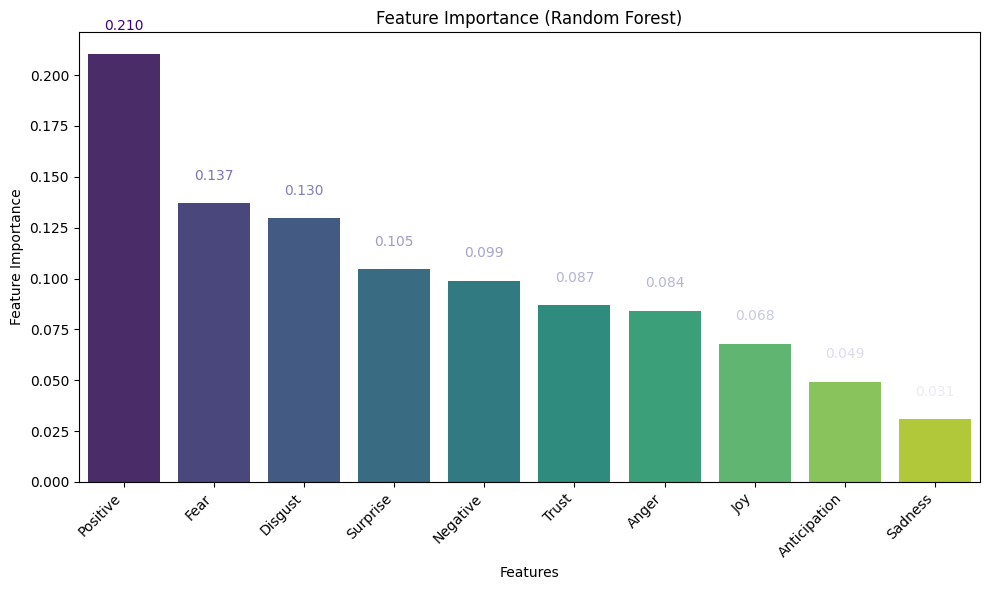

In [ ]:
# prompt: can you create a pretty visualization to show the output result of the feature importance (random forest), can you make more important feature more purple and less important feature another color

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is already calculated from your Random Forest model
# Example feature_importance (replace with your actual data):
# feature_importance = pd.Series({'Joy': 0.3, 'Anger': 0.2, 'Sadness': 0.15, 'Trust': 0.12, 'Fear': 0.1, 'Positive': 0.08, 'Anticipation': 0.05})

# Normalize the feature importances for color mapping
normalized_importance = feature_importance / feature_importance.max()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette="viridis") # Use viridis palette
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")

# Add color mapping
for i, v in enumerate(feature_importance):
  color = plt.cm.Purples(normalized_importance[i]) # Purple for higher importance
  plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', color=color) # Show the value and map to color

plt.tight_layout()
plt.show()